In [649]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step-1: Data Collection
stat = pd.read_csv('loan_approved.csv')
stat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [585]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 1. Categorical Data (Qualitative)
#### Categorical data represents groupings or classifications. It is divided into two types: Nominal and Ordinal.

### i) Nominal Data (Names, Labels)

#### Nominal data classifies items into distinct categories without any inherent order or rank. If you rearrange the order of the categories, the meaning of the data does not change, order does not matter.
#### Examples: Gender, Marital Status, Blood Group, etc.

### ii) Ordinal Data (Ranking)

#### Ordinal data ranks items in a specific order, indicating a hierarchy or preference. The order of the categories is meaningful, and you can assign numerical values based on the ranking. Ordinal data classifies items into categories that have a clear, logical rank or sequence. However, the distance or magnitude between the categories is not known or unequal
#### Examples: Education Level (High School, Bachelor's, Master's), Customer Satisfaction (Low, Medium, High), etc.

## 2. Numerical Data (Quantitative)
#### Numerical data represents quantities or measurements. It is further divided into two types: Discrete and Continuous.

### i) Discrete Data (Countable)

#### Discrete data consists of distinct, separate values that can be counted or measured in whole units. Each value is separate and distinct, and there is no intermediate value between them.Discrete data consists of countable items. It can only take on a finite or countably infinite number of specific, distinct values, usually whole numbers.
#### Examples: Number of Children, Number of Employees, etc.

### ii) Continuous Data (Measurable)

#### Continuous data represents measurements that can take on any value within a range. It is infinite and can be measured with infinite precision. Continuous data can be further divided into two types: Interval and Ratio.
#### Examples: Height, Weight, Temperature, etc.




## Segregation of columns into many types of data :-
### Nominal = Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Loan_Status (Approved)
### Ordinal = Property_Area
### Discrete = Loan_Amount_Term, Credit_History
### Continoues value = ApplicantIncome, CoapplicantIncome, LoanAmount

# Data Cleaning like:
### 1. Handling missing values
### 2. Handling Outliers
### 3. Handling Duplicates
### 4. Handling Irrelevant Data
### 5. Handling Inconsistent Data
### 6. Handling Incomplete Data
### 7. Handling Inaccurate Data

In [586]:
len(stat['Loan_ID']) # categorical nominal (total no of observations)

614

In [587]:
len(stat['Gender'].unique()) # categorical nominal (unique categories)

3

In [588]:
stat.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [589]:
len(stat['Married'].unique()) # categorical nominal (unique categories)

3

In [590]:
len(stat['Dependents'].unique()) # categorical nominal (unique categories)

5

In [591]:
len(stat['Education'].unique()) # categorical nominal

2

In [592]:
len(stat['Self_Employed'].unique()) # categorical nominal

3

In [593]:
len(stat['ApplicantIncome'].unique()) # continuous

505

In [594]:
len(stat['CoapplicantIncome'].unique()) # continuous

287

In [595]:
len(stat['LoanAmount'].unique()) # continuous

204

In [596]:
len(stat['Loan_Amount_Term'].unique()) # discrete

11

In [597]:
len(stat['Credit_History'].unique()) # discrete

3

In [598]:
len(stat['Property_Area'].unique()) # categorical ordinal

3

In [599]:
len(stat['Loan_Status (Approved)'].unique()) # categorical nominal

2

## Where we use central tendencies ?
#### MODE --> we use for categorical data
#### MEDIAN , MEAN --> we use for numerical data

#### Variance --> How Spread out the data is from the mean.
#####   Higher variance --> Data is widely spread out
#####   Lower variance --> Data is close to the mean

#### Standard Deviation --> Square root of Variance


In [600]:
stat['Gender'] = stat['Gender'].fillna(stat['Gender'].mode()[0])

In [601]:
print(stat['Gender'].isnull().sum()) # after filling Nan (null values)

0


In [602]:
print(stat['Self_Employed'].isnull().sum()) # before filling Nan (null values)

32


In [603]:
stat['Self_Employed'] = stat['Self_Employed'].fillna(stat['Self_Employed'].mode()[0])

In [604]:
print(stat['Self_Employed'].isnull().sum()) # after filling Nan (null values)

0


In [605]:
print(stat['LoanAmount'].isnull().sum())# before filling Nan (null values)

22


In [606]:
stat['LoanAmount'] = stat['LoanAmount'].fillna(stat['LoanAmount'].median())

In [607]:
print(stat['LoanAmount'].isnull().sum()) # after filling Nan (null values)

0


In [608]:
print(stat['Loan_Amount_Term'].isnull().sum())# before filling Nan (null values)

14


In [609]:
stat['Loan_Amount_Term'] = stat['Loan_Amount_Term'].fillna(stat['Loan_Amount_Term'].median())

In [610]:
print(stat['Loan_Amount_Term'].isnull().sum()) # after filling Nan (null values)

0


In [611]:
print(stat['Credit_History'].isnull().sum())# before filling Nan (null values)

50


In [612]:
stat['Credit_History'] = stat['Credit_History'].fillna(stat['Credit_History'].mode()[0])

In [613]:
print(stat['Credit_History'].isnull().sum())# after filling Nan (null values)

0


In [614]:
stat.isnull().sum()  # this tells us totally whether any missing values are there in entire dataset at once instead of checking for every column

Loan_ID                    0
Gender                     0
Married                    3
Dependents                15
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [615]:
# as we seen some of the columns have missing values so start with married

stat['Married'] = stat['Married'].fillna(stat['Married'].mode()[0])

In [616]:
print(stat['Married'].isnull().sum())

0


In [617]:
# next dependents

stat['Dependents'] = stat['Dependents'].fillna(stat['Dependents'].mode()[0])

In [618]:
print(stat['Dependents'].isnull().sum())

0


In [619]:
stat.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [650]:
# applying z-score on applicantIncome column
# Step-3: Removing Outliers

m = stat['ApplicantIncome'].mean()
s = stat['ApplicantIncome'].std()

print(stat['ApplicantIncome'].mean())
print(stat['ApplicantIncome'].std())

5403.459283387622
6109.041673387178


In [621]:
stat['ApplicantIncome'].head()


0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

In [622]:
z1 = (5849 - m)/s

print(z1)

0.07293135984867923


In [623]:
z2 = (4583 - m)/s
 
print(z2)

-0.13430245319192854


In [624]:
z3 = (3000 - m)/s

print(z3)

-0.3934265653904136


In [625]:
z4 = (2583 - m)/s

print(z4)

-0.4616860440933626


In [626]:
z5 = (6000 - m)/s
print(z5)   

0.09764882096173749


In [627]:
# any values -3<=z<=3 are called normal values and z < -3 and z > 3 are called outliers (abnormal values). this limit is called scale of standard deviation. 
# it comes from normal distribution.


# decision based algorithms are not effected by outliers we can keep them they are robust to outliers

# check the percentage of outliers in your data

# remove the outliers  only for 10% of the data  


# IQR method is used for only gaussian distribution
# Z- Score method is used for both gaussian and normal distribution


# Distribution :- It will calculate the probability of occurence of random variable. there are 3 kinds of things it have they are:
        # 1) frequency
        # 2) probability
        # 3) density

# Distortion of Normal Distribution :-
# 1)Skewness
# 2)Kurtosis

#We calculate skewness and kurtosis primarily because they tell us if our data distribution is distorted and whether it meets the fundamental assumptions of many statistical methods and machine learning models.

# Transformers :- Converting data from not-normal to normal distribution with out removing data . The types are :
# 1) power transformer
# 2) log function ( from numpy package )

# --> After Transformation we cannot analyze any data since every value is changed.

In [654]:
# Step-4 : Checking Distribution of Data
# skewness = Tells Symmetry of Data 
# 0 -> Perfectly Symmetric
# >0 -> Right Skewed (Tail on Right)
# <0 -> Left Skewed (Tail on Left)



# Outlier Removal = Removing Spoiled Apples
# Skewness and Kurtosis = Checking apple shape and quality

print("Skew for ApplicationIncome :",stat['ApplicantIncome'].skew())
print("Skew for CoApplicationIncome :",stat['CoapplicantIncome'].skew())
print("Skew for LoanAmount :",stat['LoanAmount'].skew())
print("Skew for LoanAmountTerm :",stat['Loan_Amount_Term'].skew())


Skew for ApplicationIncome : 6.539513113994625
Skew for CoApplicationIncome : 7.491531216657306
Skew for LoanAmount : 2.677551679256059
Skew for LoanAmountTerm : -2.362414124216269


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

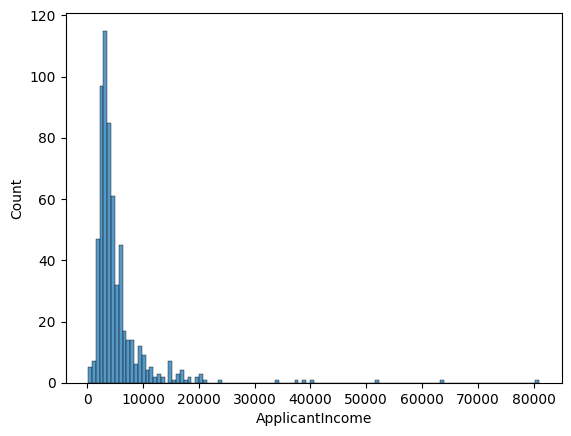

In [659]:
sns.histplot(stat['ApplicantIncome'])

In [658]:
# Kurtosis = Tells How sharp or flat the data is.
# 0 -> Perfectly Flat
# >0 -> Leptokurtic (High peakedness)
# <0 -> Platykurtic (Low peakedness)

print("Kurtosis for ApplicationIncome :",stat['ApplicantIncome'].kurtosis())
print("Kurtosis for CoApplicationIncome :",stat['CoapplicantIncome'].kurtosis())
print("Kurtosis for LoanAmount :",stat['LoanAmount'].kurtosis())
print("Kurtosis for LoanAmountTerm :",stat['Loan_Amount_Term'].kurtosis())

Kurtosis for ApplicationIncome : 60.54067593369113
Kurtosis for CoApplicationIncome : 84.95638421103374
Kurtosis for LoanAmount : 10.40153349029416
Kurtosis for LoanAmountTerm : 6.673473692814259


In [ ]:
# applying one hot encoding only for non numeric columns which converts non numeric columns into numeric columns

# Nominal Data = One hot encoding
# Ordinal Data = Label encoding

df1 = pd.get_dummies(stat['Property_Area'],prefix='Property_Area',drop_first=True,dtype=int)
stat = pd.concat([stat,df1],axis=1).drop(['Property_Area'],axis=1)

In [631]:
stat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1


In [632]:
stat.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status (Approved)     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [633]:
df1 = pd.get_dummies(stat['Gender'],prefix='Gender',dtype=int) #drop_first=True
stat = pd.concat([stat,df1],axis=1).drop(['Gender'],axis=1)

stat.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,0,1,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1,0,1


In [634]:
df1 = pd.get_dummies(stat['Married'],prefix='Married',drop_first=True,dtype=int)
stat = pd.concat([stat,df1],axis=1).drop(['Married'],axis=1)

In [635]:
stat.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,0,1,0,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,0,0,1,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1,0,1,0


In [636]:
df1 = pd.get_dummies(stat['Education'],prefix='Education',drop_first=True,dtype=int) #drop_first=True
stat = pd.concat([stat,df1],axis=1).drop(['Education'],axis=1)
stat.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_Yes,Education_Not Graduate
0,LP001002,0,No,5849,0.0,128.0,360.0,1.0,Y,0,1,0,1,0,0
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,N,0,0,0,1,1,0
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,1
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Y,0,1,0,1,0,0


In [637]:
df1 = pd.get_dummies(stat['Self_Employed'],prefix='Self_Employed',drop_first=True,dtype=int) #drop_first=True
stat = pd.concat([stat,df1],axis=1).drop(['Self_Employed'],axis=1)
stat.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,0,1,0,1,0,0,0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,0,0,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,1,0
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,0,1,0,0,0


In [638]:
df1 = pd.get_dummies(stat['Loan_Status (Approved)'],prefix='Loan_Status (Approved)',drop_first=True,dtype=int) #drop_first=True
stat = pd.concat([stat,df1],axis=1).drop(['Loan_Status (Approved)'],axis=1)
stat.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status (Approved)_Y
0,LP001002,0,5849,0.0,128.0,360.0,1.0,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,0,0,1,1,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,0,1,0,1,0,0,0,1


In [639]:
df1 = pd.get_dummies(stat['Dependents'],prefix='Dependents',drop_first=True)
stat = pd.concat([stat,df1],axis=1).drop(['Dependents'],axis=1)

stat.head()


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status (Approved)_Y,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,5849,0.0,128.0,360.0,1.0,0,1,0,1,0,0,0,1,False,False,False
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,0,1,1,0,0,0,True,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,1,1,False,False,False
3,LP001006,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,1,0,1,False,False,False
4,LP001008,6000,0.0,141.0,360.0,1.0,0,1,0,1,0,0,0,1,False,False,False


In [640]:
stat.shape

(614, 17)

<Axes: xlabel='LoanAmount', ylabel='Count'>

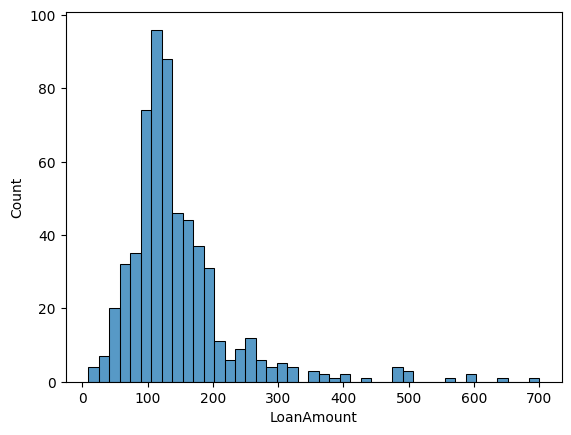

In [642]:
sns.histplot(stat['LoanAmount'])

In [ ]:
# applying power transformers  only for numerical columns

from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method='yeo-johnson')

In [644]:
la_trans = trans.fit_transform(stat[['LoanAmount']])
la_trans.shape

(614, 1)

In [645]:
print("Reduced skewness due to power transformation:",pd.Series(la_trans.reshape(614,)).skew())
print("Reduced Kurtosis due to power transformation:",pd.Series(la_trans.reshape(614,)).kurt())

Reduced skewness due to power transformation: 0.01976628563201427
Reduced Kurtosis due to power transformation: 2.2567992704908284


<Axes: ylabel='Count'>

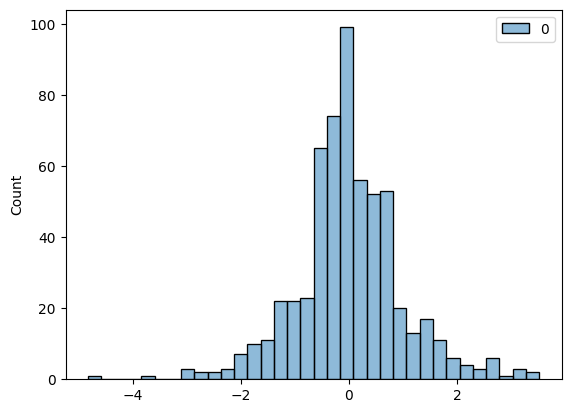

In [646]:
sns.histplot(la_trans)

In [647]:
la_trans = trans.fit_transform(stat[['ApplicantIncome']])
la_trans.shape

(614, 1)

In [648]:
print("Reduced skewness due to power transformation:",pd.Series(la_trans.reshape(614,)).skew())
print("Reduced Kurtosis due to power transformation:",pd.Series(la_trans.reshape(614,)).kurt())

Reduced skewness due to power transformation: -0.0929456078986215
Reduced Kurtosis due to power transformation: 4.770626414642093


In [661]:
la_trans = trans.fit_transform(stat[['CoapplicantIncome']])
la_trans.shape

(614, 1)

In [ ]:
print("Reduced skewness due to power transformation:",pd.Series(la_trans.reshape(614,)).skew())
print("Reduced Kurtosis due to power transformation:",pd.Series(la_trans.reshape(614,)).kurt())

Reduced skewness due to power transformation: -0.14564645552424058
Reduced Kurtosis due to power transformation: -1.8778432745796496


In [664]:
la_trans = trans.fit_transform(stat[['Loan_Amount_Term']])
la_trans.shape

(614, 1)

In [665]:
print("Reduced skewness due to power transformation:",pd.Series(la_trans.reshape(614,)).skew())
print("Reduced Kurtosis due to power transformation:",pd.Series(la_trans.reshape(614,)).kurt())

Reduced skewness due to power transformation: 0.3661791185572936
Reduced Kurtosis due to power transformation: 6.785939632684185


In [667]:
# Complete Data Analysis (Pipeline):
# 1) Load Data
# 2) Identify Categorical and Numeric Columns
# 3) Handle Missing Values
# 4) Analyze and Remove Outliers
# 5) Check Skewness and Kurtosis and Fix Distribution if required
# 6) Apply One Hot Encoding
# 7) Apply Power Transformation

In [ ]:
# ⭐ 1️⃣ After handling missing values, why remove outliers?

# Because missing values and outliers are completely different problems.

# ✔ Missing values = Empty gaps
# ✔ Outliers = Extreme wrong/abnormal values

# Even if missing values are fixed, extreme values still exist.
# These outliers:

# Damage the mean

# Increase standard deviation

# Mislead distributions

# Reduce model accuracy

# Create biased training


# So removing missing values does not remove outliers.

# 👉 That’s why after cleaning missing values → we must still remove outliers.


# ---

# ⭐ 2️⃣ After removing outliers, why check skewness and kurtosis?

# Because outlier removal does NOT fix the shape of the distribution.

# Skewness = direction of tail

# Kurtosis = thickness of tails / peak height


# Removing outliers only removes extreme points.
# But the remaining data may still be badly shaped.

# For example:

# 10, 12, 14, 15, 16, 18, 20, 1000

# Removing 1000 fixes the outlier
# BUT the distribution might still be right-skewed.

# Skewness and kurtosis still may not be normal.

# 👉 So even after outliers are removed,
# you MUST check the shape of the distribution.


# ---

# ⭐ 3️⃣ Why fix skewness and kurtosis (fix distribution)?

# Because most ML models and statistical tests assume normal or near-normal distribution.

# If distribution is NOT normal:

# Mean becomes unreliable

# Standard deviation becomes unstable

# Regression lines become inaccurate

# Loss functions behave badly

# Convergence becomes slow

# Predictions become biased


# Fixing distribution reduces skewness and stabilizes tails, making data suitable for modeling.

# 👉 Even if no outliers exist → distribution may STILL be bad.
# So fixing skewness/kurtosis is a separate compulsory step.


# ---

# ⭐ 4️⃣ Even after fixing distribution, why apply Power Transformation?

# This is the MOST IMPORTANT POINT.

# Fixing distribution manually (log, sqrt, boxcox) handles shape,
# BUT NOT complete normalization and variance stabilization.

# PowerTransformer does all of these automatically:

# ✔ Reduce skewness

# ✔ Reduce kurtosis

# ✔ Make distribution close to normal

# ✔ Make variance stable

# ✔ Scale the data (standardize)

# ✔ Improve model learning

# PowerTransformer =
# Auto Log + Auto BoxCox + Auto StandardScaler + Auto Normalizer

# It ensures:

# all numerical columns follow similar scale

# no column dominates the model

# models learn faster

# gradient descent converges smoothly

# accuracy improves massively


# 👉 Power Transformer is the final polishing step of preprocessing.


# ---

# ⭐ FINAL SUMMARY (VERY EASY TO REMEMBER)

# Step	Why It Is Needed

# Fix missing values	Remove blanks so model doesn’t crash
# Remove outliers	Remove extreme values that distort analysis
# Check skewness & kurtosis	Outliers removal does NOT fix distribution shape
# Fix distribution	Makes data symmetric & stable for ML
# Apply PowerTransformer	Best final step: stabilizes variance and normalizes all numerical features



# ---

# ⭐ SUPER SIMPLE MEMORY TRICK

# 👉 Missing values = Gaps (fill them)
# 👉 Outliers = Extreme values (remove them)
# 👉 Skewness = Tail direction (shape problem)
# 👉 Kurtosis = Tail thickness/peak (shape problem)
# 👉 PowerTransformer = Automatic full correction + scaling